<center><font size=30>Welcome to Titanic </font></center>

<img src="tenor.gif" fontsize=130px></src>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import pandas_profiling
from scipy import stats

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,auc

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
train_profile = pandas_profiling.ProfileReport(train_data)
#train_profile

In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [10]:
test_profile = pandas_profiling.ProfileReport(test_data)
#test_profile

In [11]:
print("Features : {}".format([c for c in train_data.columns]))
print("Number of samples available for Training : {}".format(train_data.shape[0]))
print("Number of samples available for Testing : {}".format(test_data.shape[0]))
print("Target Columnt : {}".format("Survived"))

Features : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Number of samples available for Training : 891
Number of samples available for Testing : 418
Target Columnt : Survived


In [12]:
# Checking for Null Values

print("Missing values in training dataset :\n{}".format(train_data.isnull().sum()))

Missing values in training dataset :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [13]:
print("Precentage of Age data missing in train : {}%".format(((train_data.Age.isnull().sum()/train_data.shape[0])*100)))
print("Precentage of Embarked data missing in train : {}%".format(((train_data.Cabin.isnull().sum()/train_data.shape[0])*100)))

Precentage of Age data missing in train : 19.865319865319865%
Precentage of Embarked data missing in train : 77.10437710437711%


In [14]:
print("Missing values in test dataset :\n{}".format(test_data.isnull().sum()))

Missing values in test dataset :
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [15]:
print("Precentage of Age data missing in test : {}%".format(((test_data.Age.isnull().sum()/test_data.shape[0])*100)))
print("Precentage of Embarked data missing in test : {}%".format(((test_data.Cabin.isnull().sum()/test_data.shape[0])*100)))

Precentage of Age data missing in test : 20.574162679425836%
Precentage of Embarked data missing in test : 78.22966507177034%


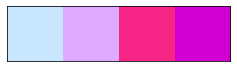

In [16]:
custom_colors = ["#c8e7ff","#deaaff", "#f72585","#d100d1"]
customPalette = sns.set_palette(sns.color_palette(custom_colors))


sns.palplot(sns.color_palette(custom_colors),size=1)
plt.tick_params(axis='both', labelsize=0, length = 0)


In [17]:
# EDA and Feature Engineering

In [18]:
sc = StandardScaler()
le = LabelEncoder()

<br></br>

<center> <font size=20 color ="#d100d1" > CABIN</font></center>

<br> <br>
<font size=20> Distribution of Classes</font>

<img src="dist_of_classes.PNG"> </src>

<font size=20> Decks </font>

<img src="deck.PNG"> </src>

In [19]:
train_data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [20]:
train_data["Cabin"] = train_data["Cabin"].apply(lambda x:x[0] if pd.notnull(x) else "Missing")
test_data["Cabin"] = test_data["Cabin"].apply(lambda x:x[0] if pd.notnull(x) else "Missing")

In [21]:
train_data["Cabin"].value_counts(dropna=False)

Missing    687
C           59
B           47
D           33
E           32
A           15
F           13
G            4
T            1
Name: Cabin, dtype: int64

In [22]:
test_data["Cabin"].value_counts(dropna=False)

Missing    327
C           35
B           18
D           13
E            9
F            8
A            7
G            1
Name: Cabin, dtype: int64

<font size = 4 color="#f72585"><b>We can see there is only 1 passanger in <i>T</i> cabin and <i>T</i> cabin in missing in test dataset</b>
<br><br>
<b> Lets check how we can handle this data </b></font>

In [23]:
train_data[train_data["Cabin"]=="T"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


In [24]:
train_data.groupby("Cabin")["Fare"].mean().sort_values(ascending=False)

Cabin
B          113.505764
C          100.151341
D           57.244576
E           46.026694
A           39.623887
T           35.500000
Missing     19.157325
F           18.696792
G           13.581250
Name: Fare, dtype: float64

<font size=4 color = "#f72585"><b> We will move passanger in cabin <emp>T</emp> to Cabin <emp>A</emp> as according to the fare </b></font>

In [25]:
index = train_data[train_data["Cabin"]=="T"].index
train_data.loc[index,"Cabin"] ="A"

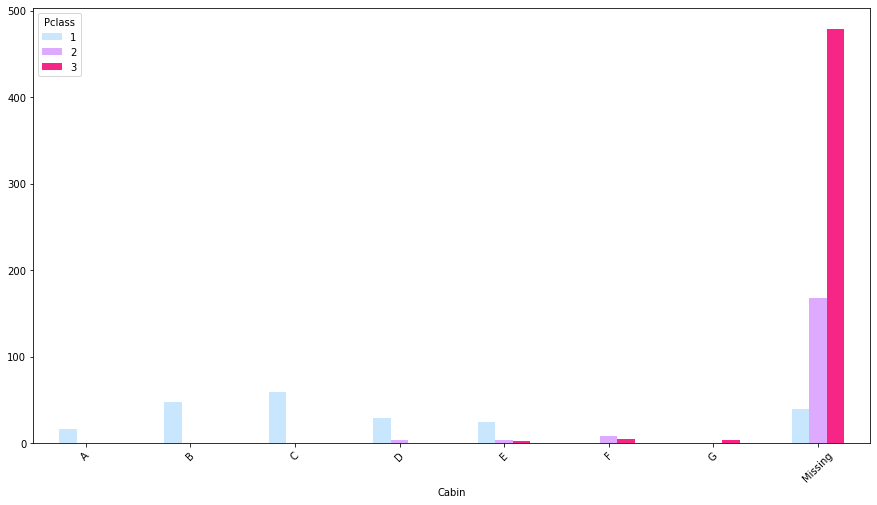

In [26]:
pd.crosstab(train_data["Cabin"],train_data["Pclass"]).plot(kind="bar")
plt.gcf().set_size_inches(15,8)
plt.xlabel("Cabin",fontsize=10)
plt.xticks(rotation=45)
plt.show()

<font size=4 color="#f72585"> <p>As we can see, Class A, B, C has only Class 1 Passangers so these classes can be combined together</p>
<p>Class D and E has class 1, 2 and class 1,2,3 Passangers respectively</p>
<p>Class F and G has Clas 2,3 and class 3 passangers respectively. We will combined these two and will see the results</p>
<p> Missing Data has Highest No. of Passangers and contains passangers from all 3 classes</p>
</font>
        

In [27]:
train_data["Cabin"] = train_data["Cabin"].replace(["A","B","C"],"ABC")
train_data["Cabin"] = train_data["Cabin"].replace(["F","G"],"FG")

In [28]:
test_data["Cabin"] = test_data["Cabin"].replace(["A","B","C"],"ABC")
test_data["Cabin"] = test_data["Cabin"].replace(["F","G"],"FG")

In [29]:
train_data["Cabin"] = LabelEncoder().fit_transform(train_data.Cabin)
test_data["Cabin"] = LabelEncoder().fit_transform(test_data.Cabin)

</br></br></br></br>

<font color="#d100d1" size="20"> AGE </font>

In [30]:
def hist(x,title):
    plt.figure(figsize = (10,8))
    ax = sns.distplot(x, 
                 kde=True,bins=40);
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches, colors):
        rec.set_color(col)
    plt.title(title)

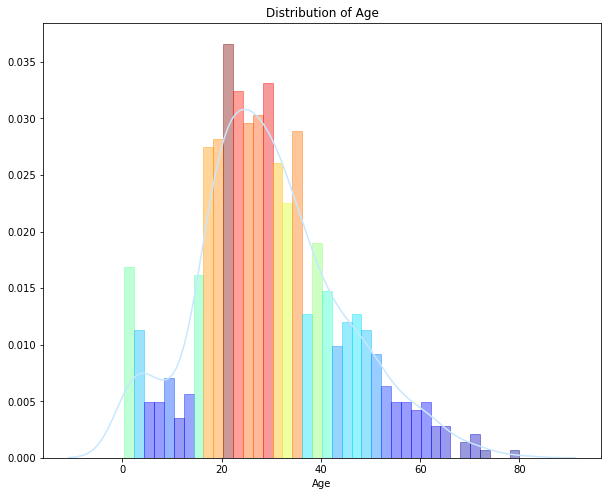

In [31]:
hist(train_data["Age"],"Distribution of Age")

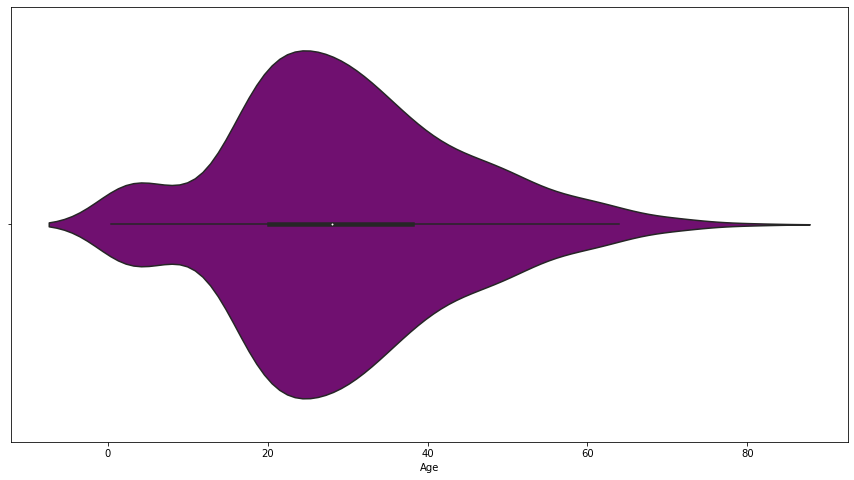

In [32]:
sns.violinplot(train_data.Age,color="purple")
plt.gcf().set_size_inches(15,8)

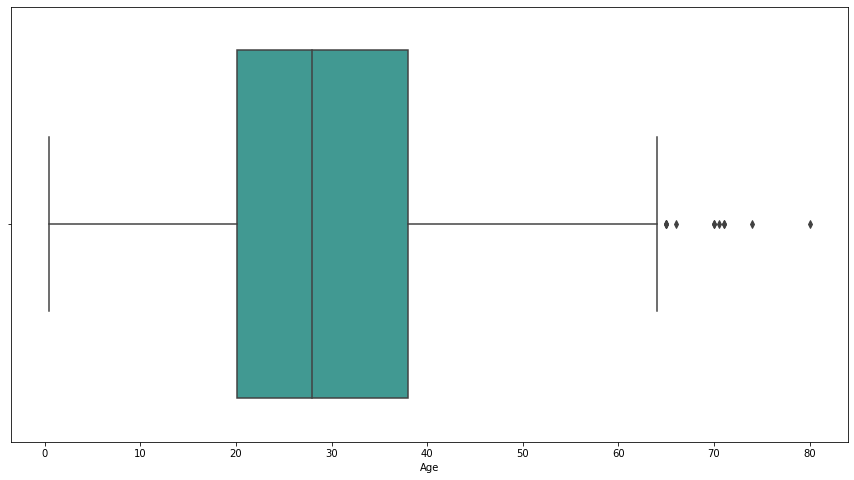

In [33]:
sns.boxplot(train_data["Age"],color="#32a89e")
plt.gcf().set_size_inches(15,8)

In [34]:
print("median : {}".format(train_data.Age.median(skipna=True)))
train_data.Age.describe(percentiles=(0.3,0.5,0.6,0.7,0.75,0.85,0.9,0.95,1))

median : 28.0


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
30%       22.000000
50%       28.000000
60%       31.800000
70%       36.000000
75%       38.000000
85%       45.000000
90%       50.000000
95%       56.000000
100%      80.000000
max       80.000000
Name: Age, dtype: float64

<font size=4 color="#f72585">As median > mean, the distribution is right-skewed, as we will replace the null values with median <font>

In [35]:
train_data["Age"].fillna(train_data["Age"].median(skipna=True),inplace=True)
test_data["Age"].fillna(test_data["Age"].median(skipna=True),inplace=True)

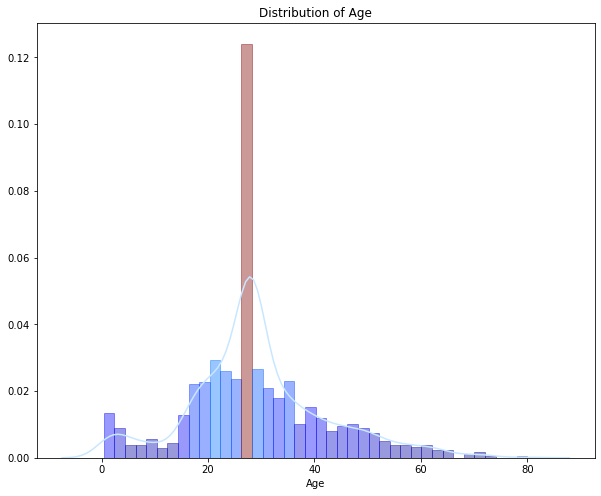

In [36]:
hist(train_data["Age"],"Distribution of Age")

In [37]:
IQR = train_data.Age.quantile(0.75) - train_data.Age.quantile(0.25)
Lower_fence = train_data.Age.quantile(0.25) - (IQR * 1.5)
Upper_fence = train_data.Age.quantile(0.75) + (IQR * 1.5)

print("Upper Fence : {} \nLower Fence : {} \nIQR : {}".format(Upper_fence,Lower_fence,IQR))

Upper Fence : 54.5 
Lower Fence : 2.5 
IQR : 13.0


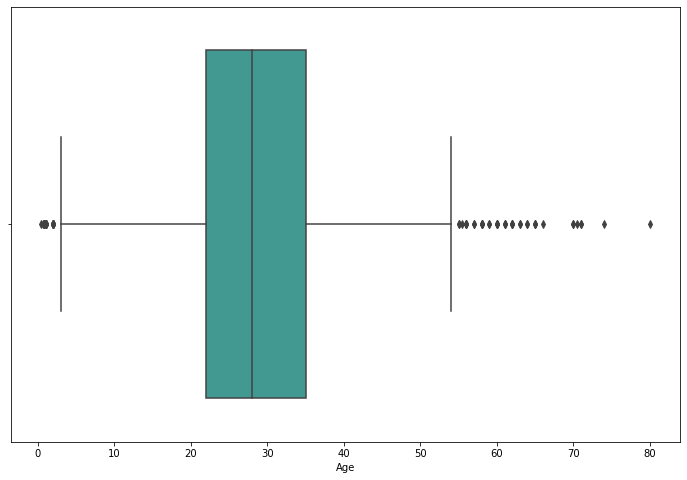

In [38]:
sns.boxplot(train_data.Age,color="#32a89e")
plt.gcf().set_size_inches(12,8)

In [39]:
train_data["Age"].drop(train_data[(train_data.Age<2.5)|(train_data.Age>68)].index,inplace=True)

</br></br></br></br>

<font color="#d100d1" size="20"> Embarked </font>

In [40]:
print("Missing Data for Embarker in test : {}".format(train_data.Embarked.isnull().sum()))
print("Categories in Embarked : {}".format(train_data.Embarked.unique()))

Missing Data for Embarker in test : 2
Categories in Embarked : ['S' 'C' 'Q' nan]


In [41]:
train_data[train_data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,0,NaN


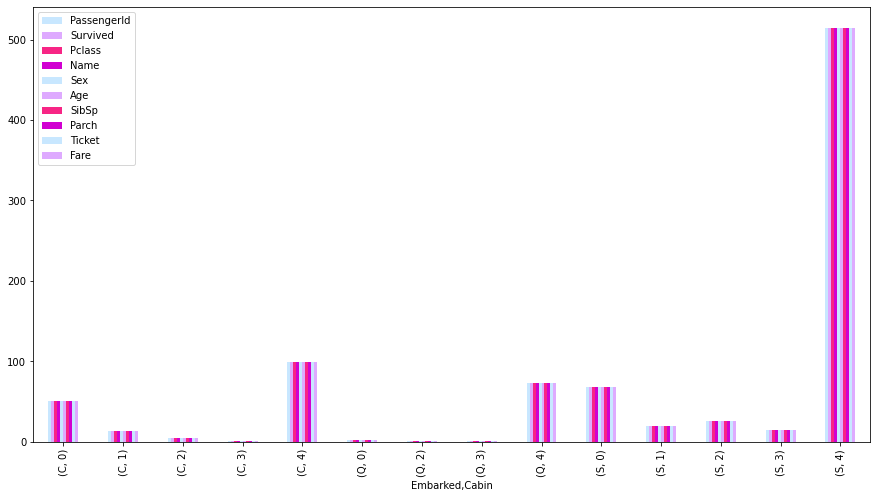

In [42]:
train_data.groupby(["Embarked","Cabin"]).count().plot(kind="bar")
plt.gcf().set_size_inches(15,8)

<font size=4 color="#f72585">We will replace Null values with <emp>S</emp> </font>

In [43]:
train_data.Embarked.fillna("S",inplace=True)
test_data.Embarked.fillna("S",inplace=True)

In [44]:
print("Categories in Embarked : {}".format(train_data.Embarked.unique()))

Categories in Embarked : ['S' 'C' 'Q']


<font size=4 color="#f72585">Lets Encode Embarked, we will keep 0,1,2 for S,C,Q resp  </font>

In [45]:
Embarked = {"S":0,"C":1,"Q":2}

train_data.Embarked = [Embarked[item] for item in train_data.Embarked]
test_data.Embarked = [Embarked[item] for item in test_data.Embarked]

</br></br></br></br>

<font color="#d100d1" size="20"> Gender </font>

<font size=4 color="#f72585">Lets encode <b>Gender</b>, we will keep 0 for male and 1 for female resp. </font>

In [46]:
gender = {"male":0,"female":1}

train_data.Sex = [gender[item] for item in train_data.Sex]
test_data.Sex = [gender[item] for item in test_data.Sex]

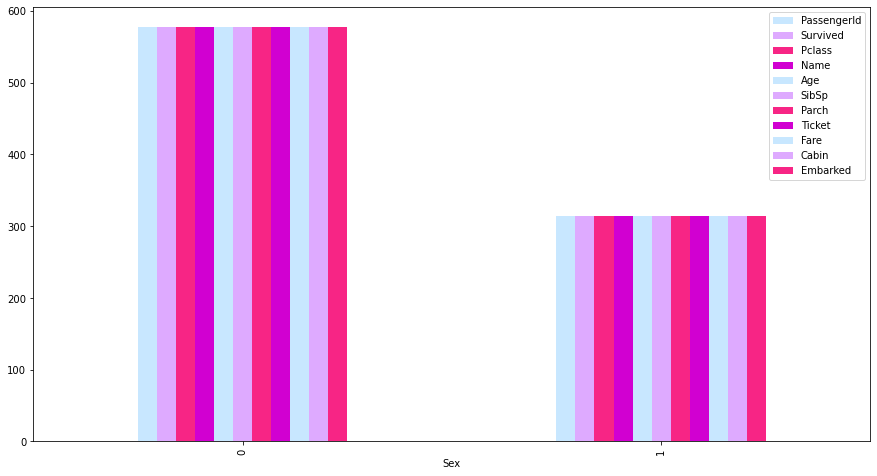

In [47]:
train_data.groupby("Sex").count().plot(kind="bar")
plt.gcf().set_size_inches(15,8)

In [48]:
print("Features : {}".format([c for c in train_data.columns]))
print("Number of samples available for Training : {}".format(train_data.shape[0]))
print("Number of samples available for Testing : {}".format(test_data.shape[0]))
print("Target Columnt : {}".format("Survived"))

Features : ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
Number of samples available for Training : 891
Number of samples available for Testing : 418
Target Columnt : Survived


</br></br></br></br>

<font color="#d100d1" size="20"> Fare </font>

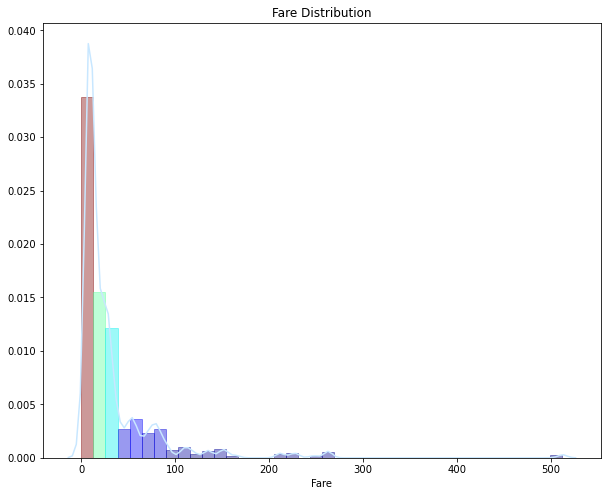

In [49]:
hist(train_data["Fare"],"Fare Distribution")

Text(0.5, 1.0, 'Fare Spread')

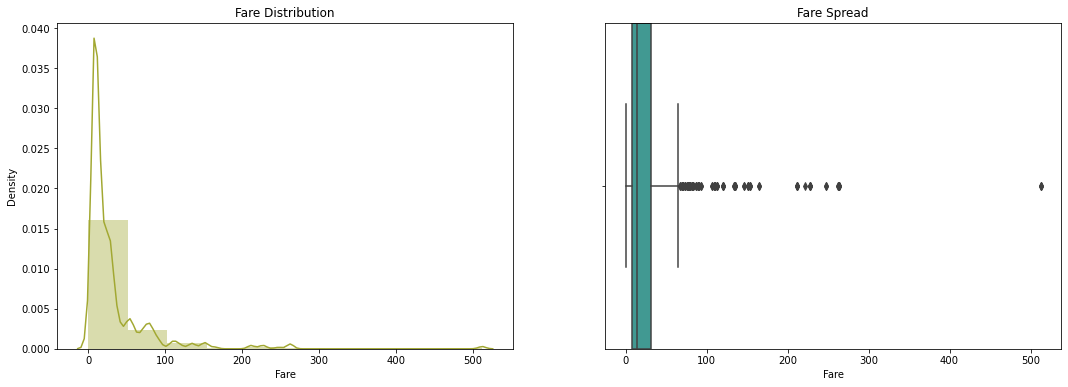

In [50]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.distplot(train_data.Fare,bins=10,color="#a2a832")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.title("Fare Distribution")

plt.subplot(1,2,2)
sns.boxplot(train_data.Fare,width=1,color="#32a89e")
plt.title("Fare Spread")


In [51]:
print("Fare Median : {}".format(train_data["Fare"].median()))
train_data["Fare"].describe()

Fare Median : 14.4542


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<font size=4 color="#f72585">As we can see from fig as well as from mean and median, as median > mean, Fare distribution is highly Right Skewed

<br><br>
    
Lets use IQR to analyze and remove Outliers
</font>



In [52]:
Q1 = train_data.quantile(0.25)
Q3 = train_data.quantile(0.75)
IQR = Q3 - Q1

print(IQR)

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Sex              1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
Cabin            0.0000
Embarked         1.0000
dtype: float64


In [53]:
IQR = train_data.Fare.quantile(0.75) - train_data.Fare.quantile(0.25)
Lower_fence = train_data.Fare.quantile(0.25) - (IQR * 1.5)
Upper_fence = train_data.Fare.quantile(0.75) + (IQR * 1.5)

print("Upper Fence : {} \nLower Fence : {} \nIQR : {}".format(Upper_fence,Lower_fence,IQR))

Upper Fence : 65.6344 
Lower Fence : -26.724 
IQR : 23.0896


In [54]:
print("Outliers for Fare are :")
train_data[(train_data["Fare"]<Lower_fence)|(train_data["Fare"]>Upper_fence)]["Fare"]

Outliers for Fare are :


1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

<font size=4 color="#f72585"> we will consider Fare > 100 and <0 as outliers</font>


In [55]:
out_index = []

train_data.drop(train_data[(train_data["Fare"]>100) | (train_data["Fare"]<0)].index,inplace=True)

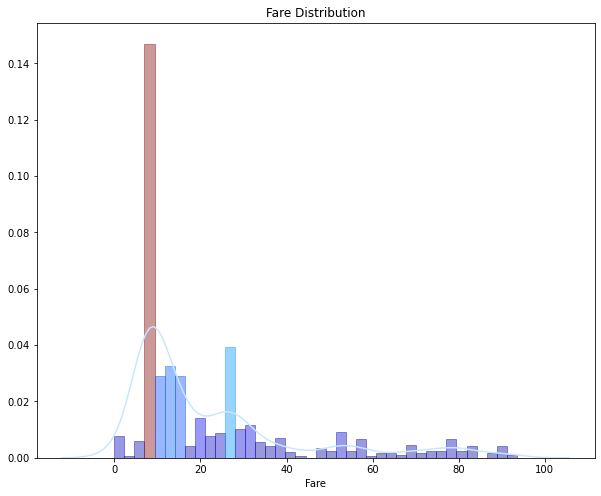

In [56]:
hist(train_data["Fare"],"Fare Distribution")

(0.0, 120.0)

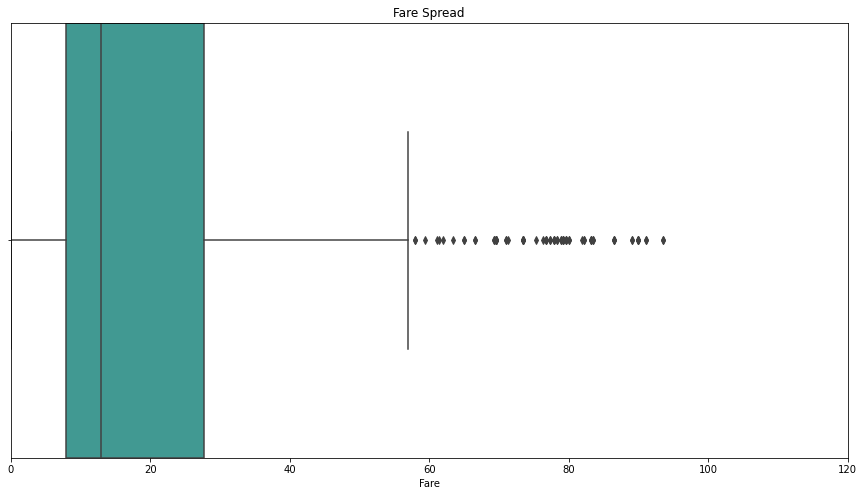

In [57]:
plt.figure(figsize=(15,8))
sns.boxplot(train_data.Fare,width=1,color="#32a89e")
plt.title("Fare Spread")
plt.xlim(0,120)

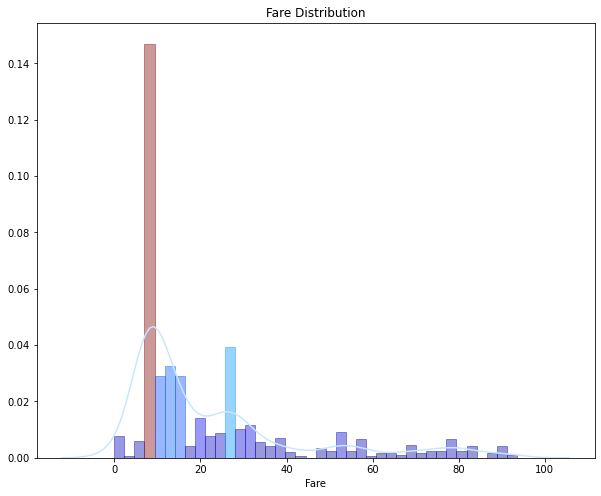

In [58]:
hist(train_data["Fare"],"Fare Distribution")

</br></br></br></br>

<font color="#d100d1" size="20"> Cabin VS Survived </font>

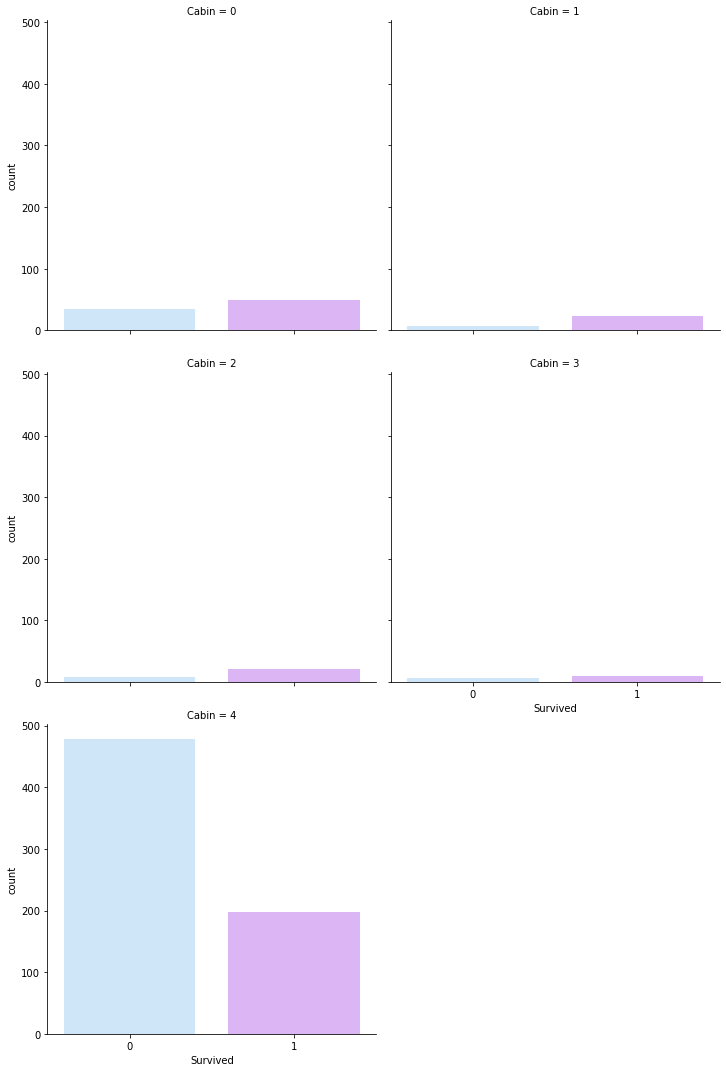

In [59]:
sns.catplot("Survived",col ="Cabin",col_wrap=2, data = train_data, kind="count")

</br></br></br></br>

<font color="#d100d1" size="20"> Pclass VS Survived </font>

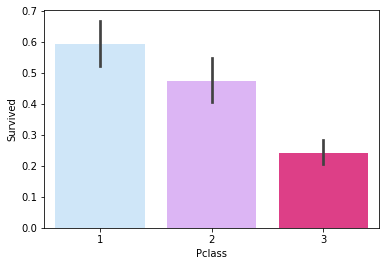

In [60]:
sns.barplot(train_data.Pclass,train_data.Survived)

</br></br></br></br>

<font color="#d100d1" size="20"> Gender VS Survived </font>

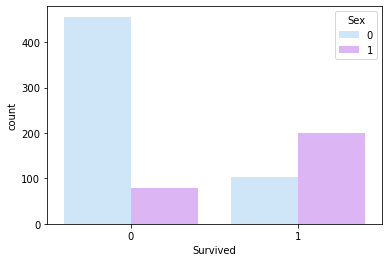

In [61]:
sns.countplot(x="Survived",data=train_data,hue="Sex")

Text(0.5, 1.0, 'Female')

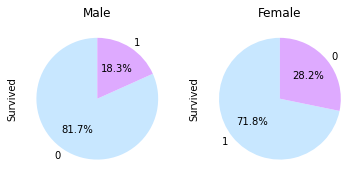

In [62]:
plt.subplot(1,2,1)
train_data[train_data.Sex==0]["Survived"].value_counts().plot.pie(startangle=90,autopct="%1.1f%%")
plt.title("Male")

plt.subplot(1,2,2)
train_data[train_data.Sex==1]["Survived"].value_counts().plot.pie(startangle=90,autopct="%1.1f%%")
plt.title("Female")

</br></br></br></br>

<font color="#d100d1" size="20"> parch VS Survived </font>

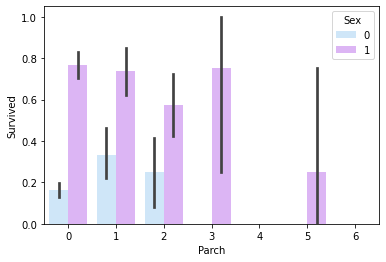

In [63]:
sns.barplot(train_data.Parch,train_data.Survived,hue=train_data.Sex)

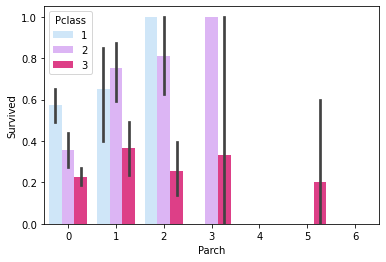

In [64]:
sns.barplot(train_data.Parch,train_data.Survived,hue=train_data.Pclass)

</br></br></br></br>

<font color="#d100d1" size="20"> Embarked VS Survived </font>

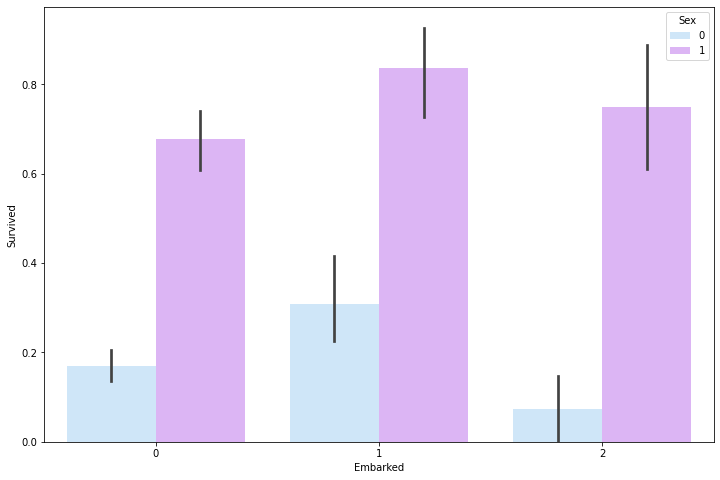

In [65]:
plt.figure(figsize=(12,8))

sns.barplot(train_data.Embarked,train_data.Survived,hue=train_data.Sex)

In [66]:
for dataset in [train_data]:
    dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_data["Title"] = dataset["Title"]

In [67]:
for dataset in [test_data]:
    dataset["Title"] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

test_data["Title"] = dataset["Title"]

In [68]:
train_data["Title"] = le.fit_transform(train_data["Title"])
test_data["Title"] = le.fit_transform(test_data["Title"])

<font size=4 color="#f72585"> PassangerId, Name and Ticket Will not make any contribution to the input, so we are dropping these columns </font>

In [69]:
train_data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)
test_data.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

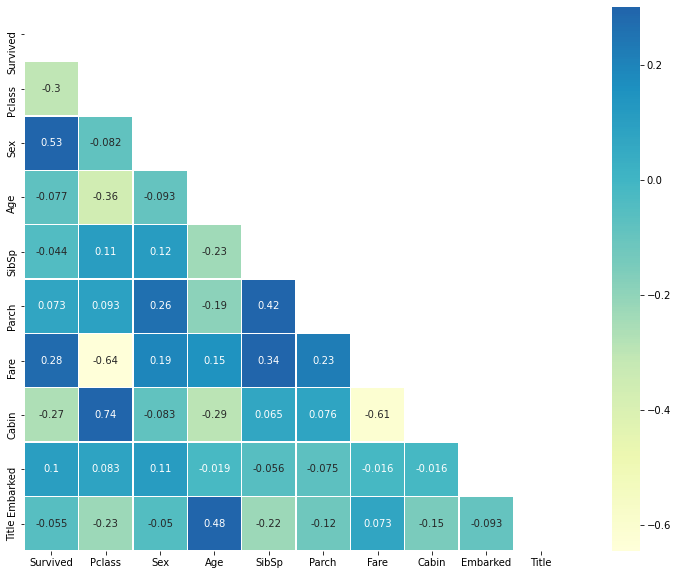

In [70]:
mask = np.triu(np.ones_like(train_data.corr(), dtype=bool))
fig, ax = plt.subplots(figsize=(16,10))
sns.heatmap(train_data.corr(), mask=mask, cmap="YlGnBu", vmax=.3, center=0,annot = True,
            square=True, linewidths=.5)
plt.show()

<font size=4 color="#f72585"> As we saw, the Cabin col has highest no. of missing Data,so there is no need of keeping it to make predictions
</font>



In [71]:
train_data.drop("Cabin", axis=1, inplace=True)
test_data.drop("Cabin", axis=1, inplace=True)

</br></br></br></br>

<font color="#46a832" size="20"> Splitting The Data </font>

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = train_data.drop("Survived",axis=1)
Y =train_data["Survived"]

In [74]:
sc = StandardScaler()
X[["Fare","Age"]] =sc.fit_transform(X[["Fare","Age"]])

In [75]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)

</br></br></br></br>

<font color="#3287a8" size="20"> Training the Model </font>

</br></br></br></br>


<font color="#a8328e" size="20"><b>Random Forest</b> </font>

In [76]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 
model.fit(x_train,y_train)
prediction_on_train = model.predict(x_train)
prediction_on_test = model.predict(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent worker

In [77]:
print("Training accuracy: ", round(accuracy_score(y_train, prediction_on_train)*100))
print("Testing accuracy: ", round(accuracy_score(y_test,prediction_on_test)*100))

Training accuracy:  85.0
Testing accuracy:  84.0


In [78]:
test_data["Fare"].fillna(test_data["Fare"].median(),inplace=True)
submission = pd.DataFrame()
test = pd.read_csv("test.csv")
submission["PassengerId"] = test["PassengerId"]
submission["Survived"] =model.predict(test_data)
submission.to_csv("submission.csv",index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished


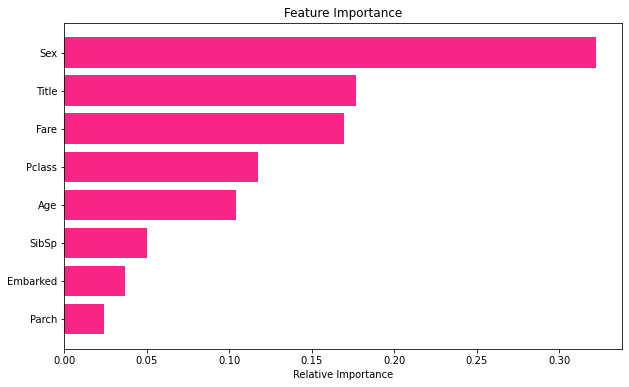

In [79]:
imp_features = model.feature_importances_
index = np.argsort(imp_features)
features = X.columns

plt.barh(range(len(index)),imp_features[index],color=custom_colors[2],align="center")
plt.title("Feature Importance")
plt.yticks(range(len(index)),[features[i] for i in index])
plt.gcf().set_size_inches(10,6)
plt.xlabel('Relative Importance')
plt.show()

</br></br></br></br>


<font color="#a8328e" size="20">Confusion Matrix </font>

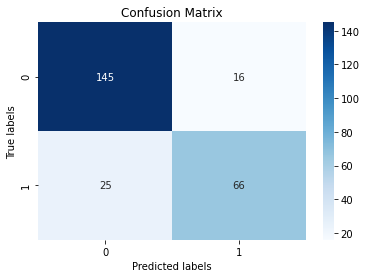

In [80]:
ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test,prediction_on_test), annot=True, ax = ax, fmt='g',cmap='Blues') #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

plt.show()

</br></br></br></br>


<font color="#a8328e" size="20">Roc Curve </font>

In [81]:
fpr,tpr,th = roc_curve(y_test,prediction_on_test)

area_under_curve = auc(fpr,tpr) 

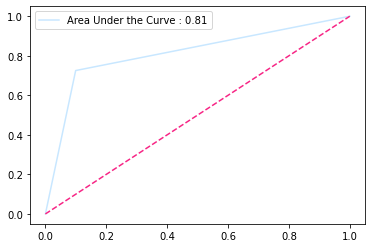

In [82]:
plt.plot(fpr,tpr,label="Area Under the Curve : %0.2f"%(area_under_curve))
plt.plot([0,1],[0,1],linestyle="dashed",color=custom_colors[2])
plt.legend()

In [83]:
submission = pd.DataFrame()
test = pd.read_csv("test.csv")
submission["PassengerId"] = test["PassengerId"]
submission["Survived"] =model.predict(test_data)
submission.to_csv("submission1.csv",index=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 1750 out of 1750 | elapsed:    0.4s finished


</br></br></br></br>


<font color="#a8328e" size="20"><b>Grid Search</b> </font>

In [84]:

from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_estimators': [ 200,300,400,500],
    'max_features': ['auto', 'sqrt'],
    'max_depth' : [5,6,7,8,9],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)
CV_rfc.best_params_


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parall

[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 283 tasks 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 220 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend Th

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend Th

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend Th

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 175 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBac

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 235 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend Th

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 190 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBac

[Parallel(n_jobs=-1)]: Done 283 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 493 out of 500 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend L

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 300}

In [85]:
model = RandomForestClassifier(n_estimators=300,max_depth=8,max_features="auto",criterion='entropy')

model.fit(x_train,y_train)
prediction_on_train = model.predict(x_test)
prediction_on_test = model.predict(x_test)

In [93]:
prediction_on_train = model.predict(x_train)
prediction_on_test = model.predict(x_test)
print("Accuracy on Train : {}".format(round(accuracy_score(y_train,prediction_on_train)*100)))
print("Accuracy on Train : {}".format(round(accuracy_score(y_test,prediction_on_test)*100)))

Accuracy on Train : 91.0
Accuracy on Train : 85.0


In [94]:
fpr,tpr,th = roc_curve(y_test,prediction_on_test)
area_under_curve = auc(fpr,tpr) 

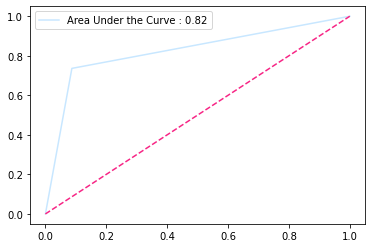

In [95]:
plt.plot(fpr,tpr,label="Area Under the Curve : %0.2f"%(area_under_curve))
plt.plot([0,1],[0,1],linestyle="dashed",color=custom_colors[2])
plt.legend()